<h2>S&amp;P 500 sentiment analysis from newsapi and reuters website based of articles of following officials and investment bankers:</h2>

<ol>
<li><p>S&amp;P 500 - news - Headlines</p></li>
<li><p>CEO of Berkshire Hathaway Warren Buffett - news - Headlines</p></li>
<li><p>CNBCs Jim Cramer - statements - news headlines on S&amp;P 500</p></li>
<li><p>US President joe Biden - statements - news headlines on S&amp;P 500</p></li>
<li><p>JP Morgan CEO Jamie Dimon - statements - news headlines on S&amp;P 500</p></li>
<li><p>Ex-Goldman Sach CEO Lloyd Blankfein - statements - news headlines on S&amp;P 500</p></li>
<li><p>Goldman Sach CEO David Solomon - statements - news headlines on S&amp;P 500</p></li>
<li><p>Bank of America CEO Brian Thomas Moynihan - statements - news headlines on S&amp;P 500</p></li>
<li><p>BlackRock CEO Larry Fink - statements - news headlines on S&amp;P 500</p></li>
<li><p>FED Chairman Jerome Powell - statements - news headlines on S&amp;P 500</p></li>
<li><p>FED Officials - statements - news headlines on S&amp;P 500</p></li>
<li><p>Lead Economists - statements - news headlines on S&amp;P 500</p></li>
</ol>



<h1>Initial imports</h1>

In [1]:
import nltk
import os
import pandas as pd
import newsapi

In [2]:
#from newsapi.newsapi_client import NewsApiClient
from newsapi import newsapi_client

In [4]:
%matplotlib inline

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.downloader.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mshel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
import string
from string import punctuation
from nltk.corpus import reuters, stopwords
from newsapi.newsapi_client import NewsApiClient
from datetime import date, datetime, timedelta

# News Headlines Sentiment

Based on the news api we  pulled the latest news articles for S&P 500 and create a DataFrame of sentiment scores. 



In [7]:
# Read your api key environment variable

api_key = '22b1baf9e3d84f549a60cd9ca7881995'


In [8]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [9]:
# set date range for downloading headlines
start_date = date.today() - timedelta(weeks=10)# ahere we can input exact timing we want to download data for, in days....
end_date = date.today() #- timedelta(days=0)

print(f"""
start date: {start_date}

end date: {end_date}
"""
)


start date: 2021-01-09

end date: 2021-03-20



In [10]:
# Fetch the S&P500 news articles

#SP500_headlines = newsapi.get_sources()
SP500_headlines = newsapi.get_everything(q="S&P 500", page_size=50,language="en", sort_by="publishedAt")

# Fetch data on S&P 500 by Jim Cramer statements

cramer_SP500_headlines = newsapi.get_everything(q=" Jim Cramer AND S&P 500", page_size=50,language="en", sort_by="publishedAt")

# Fetch data on S&P 500 by Joe Biden statements
potus_SP500_headlines = newsapi.get_everything(q=" Joe Biden AND S&P 500", page_size=50,language="en", sort_by="publishedAt")

# Fetch data on S&P 500 by Jamie Dimon statements
dimon_SP500_headlines = newsapi.get_everything(q=" Jamie Dimon AND S&P 500", page_size=50,language="en", sort_by="publishedAt")

# Fetch data on S&P 500 by Lloyd Blankfein statements
blankfein_SP500_headlines = newsapi.get_everything(q="Brian Moynihan AND S&P 500", page_size=50,language="en", sort_by="publishedAt")

# Fetch data on S&P 500 by David Solomon statements
solomon_SP500_headlines = newsapi.get_everything(q="David Solomon AND S&P 500", page_size=50,language="en", sort_by="publishedAt")

# Fetch data on S&P 500 by Warren Buffett statements
buffett_SP500_headlines = newsapi.get_everything(q="Warren Buffett AND S&P 500", page_size=50,language="en", sort_by="publishedAt")

# Fetch data on S&P 500 by lead economists statements
economists_SP500_headlines = newsapi.get_everything(q="Lead Economists AND S&P 500", page_size=50,language="en", sort_by="publishedAt")

# Fetch data on S&P 500 by Jerome Powel statements
powell_SP500_headlines = newsapi.get_everything(q="Jerome Powell AND S&P 500", page_size=50,language="en", sort_by="publishedAt")

# Fetch data on S&P 500 by FED statements
fed_SP500_headlines = newsapi.get_everything(q="FED AND S&P 500", page_size=50,language="en", sort_by="publishedAt")

# Fetch data on S&P 500 by Larry Fink statements
fink_SP500_headlines = newsapi.get_everything(q="Larry Fink AND S&P 500", page_size=50,language="en", sort_by="publishedAt")




In [11]:
# Print all publshed articles about S&P500
print(f"Total number of articles about S&P 500: {SP500_headlines['totalResults']}")

# Print all publshed articles about S&P500 based on Jim Cramer statements
print(f"Total number of articles about S&P 500 by Jim Cramer: {cramer_SP500_headlines['totalResults']}")

# Print all publshed articles about S&P500 based on Joe Biden statements
print(f"Total number of articles about S&P 500 by Joe Biden: {potus_SP500_headlines['totalResults']}")

# Print all publshed articles about S&P500 based on Jamie Dimon statements
print(f"Total number of articles about S&P 500 by Jamie Dimon: {dimon_SP500_headlines['totalResults']}")

# Print all publshed articles about S&P500 based on Lloyd Blankfein statements
print(f"Total number of articles about S&P 500 by Brian Moynihan: {blankfein_SP500_headlines['totalResults']}")

# Print all publshed articles about S&P500 based on David Solomon statements
print(f"Total number of articles about S&P 500 by David Solomon: {solomon_SP500_headlines['totalResults']}")

# Print all publshed articles about S&P500 based on Warren Buffett statements
print(f"Total number of articles about S&P 500 by Warren Buffett: {buffett_SP500_headlines['totalResults']}")

# Print all publshed articles about S&P500 based on lead economists statements
print(f"Total number of articles about S&P 500 by lead economists: {economists_SP500_headlines['totalResults']}")

# Print all publshed articles about S&P500 based on Jerome Powel statements
print(f"Total number of articles about S&P 500 by Jerome Powell: {powell_SP500_headlines['totalResults']}")

# Print all publshed articles about S&P500 based on FED statements
print(f"Total number of articles about S&P 500 by FED officials: {fed_SP500_headlines['totalResults']}")

# Print all publshed articles about S&P500 based on larry Fink statements
print(f"Total number of articles about S&P 500 by Larry Fink: {fink_SP500_headlines['totalResults']}")

Total number of articles about S&P 500: 9771
Total number of articles about S&P 500 by Jim Cramer: 65
Total number of articles about S&P 500 by Joe Biden: 882
Total number of articles about S&P 500 by Jamie Dimon: 13
Total number of articles about S&P 500 by Brian Moynihan: 2
Total number of articles about S&P 500 by David Solomon: 13
Total number of articles about S&P 500 by Warren Buffett: 461
Total number of articles about S&P 500 by lead economists: 107
Total number of articles about S&P 500 by Jerome Powell: 1166
Total number of articles about S&P 500 by FED officials: 2022
Total number of articles about S&P 500 by Larry Fink: 14


In [12]:
# Create the S&P sentiment scores DataFrame
SP500_sentiments = []

for sp500_article in SP500_headlines["articles"]:
    try:
        date = sp500_article['publishedAt']
        text = sp500_article["content"].lower()    
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        SP500_sentiments.append({
            "Date": date,
            "SP500 Text": text,
            "SP500 Compound": compound,
            "SP500 Positive": pos,
            "SP500 Negative": neg,
            "SP500 Neutral": neu,  
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
SP500_df = pd.DataFrame(SP500_sentiments)

# Reorder DataFrame columns
cols = ["Date","SP500 Compound","SP500 Negative","SP500 Neutral","SP500 Positive","SP500 Text"]
SP500_df = SP500_df[cols]
SP500_df['Date'] = pd.to_datetime(SP500_df['Date'], infer_datetime_format=True)
#SP500_df.set_index(('Date'), inplace=True)

SP500_df.head()

,Date,SP500 Compound,SP500 Negative,SP500 Neutral,SP500 Positive,SP500 Text
0,2021-03-20 16:29:57,0.7717,0.0,0.749,0.251,getty\r\nmarketing advocates of creative conce...
1,2021-03-20 16:14:02,0.0000,0.0,1.000,0.000,the latest 13f reporting period has come and g...
2,2021-03-20 16:13:45,0.7783,0.0,0.794,0.206,if you can see through these misperceptions ab...
3,2021-03-20 16:13:19,0.6369,0.0,0.903,0.097,with the fourth-quarter round of 13f filings b...
4,2021-03-20 16:12:41,0.0000,0.0,1.000,0.000,the insider monkey team has completed processi...


In [13]:
SP500_df.dtypes

Date              datetime64[ns]
SP500 Compound           float64
SP500 Negative           float64
SP500 Neutral            float64
SP500 Positive           float64
SP500 Text                object
dtype: object

In [14]:
# Create the Jim Cramer S&P sentiment scores DataFrame
cramer_SP500_sentiments = []

for cramer_sp500_article in cramer_SP500_headlines["articles"]:
    try:
        date = cramer_sp500_article['publishedAt']
        text = cramer_sp500_article["content"].lower()    
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        cramer_SP500_sentiments.append({
            "Date": date,
            "Cramer Text": text,
            "Cramer Compound": compound,
            "Cramer Positive": pos,
            "Cramer Negative": neg,
            "Cramer Neutral": neu,  
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
cramer_SP500_df = pd.DataFrame(cramer_SP500_sentiments)

# Reorder DataFrame columns
cols = ["Date", "Cramer Compound","Cramer Negative","Cramer Neutral","Cramer Positive","Cramer Text"]
cramer_SP500_df = cramer_SP500_df[cols]
cramer_SP500_df['Date'] = pd.to_datetime(cramer_SP500_df['Date'], infer_datetime_format=True)
#cramer_SP500_df.set_index(('Date'), inplace=True)
cramer_SP500_df.head()

,Date,Cramer Compound,Cramer Negative,Cramer Neutral,Cramer Positive,Cramer Text
0,2021-03-20 13:10:30,0.0000,0.000,1.000,0.000,listen on the go! a daily podcast of wall stre...
1,2021-03-19 14:10:04,-0.4019,0.072,0.928,0.000,on the one-year anniversary tuesday of the s&a...
2,2021-03-19 11:06:33,-0.4389,0.078,0.922,0.000,listen on the go! a daily podcast of wall stre...
3,2021-03-19 09:30:44,-0.2023,0.068,0.885,0.047,"<ul><li>another day, another yield battle. the..."
4,2021-03-19 08:00:00,0.2263,0.077,0.823,0.099,here's what jim cramer had to say about some o...


In [15]:
# Create the Donald Trump S&P sentiment scores DataFrame
potus_SP500_sentiments = []

for potus_sp500_article in potus_SP500_headlines["articles"]:
    try:
        date = potus_sp500_article['publishedAt']
        text = potus_sp500_article["content"].lower()    
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        potus_SP500_sentiments.append({
            "Date": date,
            "Biden Text": text,
            "Biden Compound": compound,
            "Biden Positive": pos,
            "Biden Negative": neg,
            "Biden Neutral": neu,  
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
potus_SP500_df = pd.DataFrame(potus_SP500_sentiments)

# Reorder DataFrame columns
cols = ["Date", "Biden Compound","Biden Negative","Biden Neutral","Biden Positive","Biden Text"]
potus_SP500_df = potus_SP500_df[cols]

potus_SP500_df['Date'] = pd.to_datetime(potus_SP500_df['Date'], infer_datetime_format=True)
#potus_SP500_df.set_index(('Date'), inplace=True)

potus_SP500_df.head()

,Date,Biden Compound,Biden Negative,Biden Neutral,Biden Positive,Biden Text
0,2021-03-20 13:21:46,-0.4588,0.081,0.919,0.000,blackrock ceo larry fink at a conference in ne...
1,2021-03-20 13:21:46,-0.5106,0.178,0.777,0.045,"on the whole, i would rather live in a society..."
2,2021-03-20 12:45:00,0.4767,0.085,0.782,0.133,the year 2020 was a good one for cannabis stoc...
3,2021-03-20 10:45:00,-0.3252,0.062,0.938,0.000,it isn't a popular time to be buying up corona...
4,2021-03-20 05:40:11,-0.1027,0.071,0.870,0.060,new york: investors are turning their attentio...


In [16]:
# Create the Jamie Dimon sentiment scores DataFrame
dimon_SP500_sentiments = []

for dimon_SP500_article in dimon_SP500_headlines["articles"]:
    try:
        date = dimon_SP500_article['publishedAt']
        text = dimon_SP500_article["content"].lower()    
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        dimon_SP500_sentiments.append({
            "Date": date,
            "Dimon Text": text,
            "Dimon Compound": compound,
            "Dimon Positive": pos,
            "Dimon Negative": neg,
            "Dimon Neutral": neu,  
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
dimon_SP500_df = pd.DataFrame(dimon_SP500_sentiments)

# Reorder DataFrame columns
cols = ["Date", "Dimon Compound","Dimon Negative","Dimon Neutral","Dimon Positive","Dimon Text"]
dimon_SP500_df = dimon_SP500_df[cols]

dimon_SP500_df['Date'] = pd.to_datetime(dimon_SP500_df['Date'], infer_datetime_format=True)
#dimon_SP500_df.set_index(('Date'), inplace=True)

dimon_SP500_df.head()

,Date,Dimon Compound,Dimon Negative,Dimon Neutral,Dimon Positive,Dimon Text
0,2021-03-16 07:37:59,0.5106,0.0,0.918,0.082,u.s. banks are sitting on a pile of cash that ...
1,2021-03-15 14:14:49,0.0000,0.0,1.000,0.000,"in a capital note last week, i wrote about the..."
2,2021-03-15 11:44:52,0.5106,0.0,0.916,0.084,u.s.banks are sitting on a pile of cash that c...
3,2021-03-15 02:16:02,0.0000,0.0,1.000,0.000,"in a capital note last week, i wrote about the..."
4,2021-03-14 09:30:20,0.0000,0.0,1.000,0.000,"in a capital note last week, i wrote about the..."


In [17]:
# Create the Lloyd Blankfein sentiment scores DataFrame
blankfein_SP500_sentiments = []

for blankfein_SP500_article in blankfein_SP500_headlines["articles"]:
    try:
        date = blankfein_SP500_article['publishedAt']
        text = blankfein_SP500_article["content"].lower()    
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        blankfein_SP500_sentiments.append({
            "Date": date,
            "Blankfein Text": text,
            "Blankfein Compound": compound,
            "Blankfein Positive": pos,
            "Blankfein Negative": neg,
            "Blankfein Neutral": neu,  
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
blankfein_SP500_df = pd.DataFrame(blankfein_SP500_sentiments)

# Reorder DataFrame columns
cols = ["Date", "Blankfein Compound","Blankfein Negative","Blankfein Neutral","Blankfein Positive","Blankfein Text"]
blankfein_SP500_df = blankfein_SP500_df[cols]


blankfein_SP500_df['Date'] = pd.to_datetime(blankfein_SP500_df['Date'], infer_datetime_format=True)
#blankfein_SP500_df.set_index(('Date'), inplace=True)

blankfein_SP500_df.head()

,Date,Blankfein Compound,Blankfein Negative,Blankfein Neutral,Blankfein Positive,Blankfein Text
0,2021-03-01 13:15:00,-0.5318,0.125,0.875,0.0,"despite progress, women remain absent from hal..."
1,2021-03-01 13:15:00,0.0000,0.000,1.000,0.0,"san francisco, mar. 1, 2021 /prnewswire/ -- hi..."


In [18]:
# Create the David Solomon sentiment scores DataFrame
solomon_SP500_sentiments = []

for solomon_SP500_article in solomon_SP500_headlines["articles"]:
    try:
        date = solomon_SP500_article['publishedAt']
        text = solomon_SP500_article["content"].lower()    
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        solomon_SP500_sentiments.append({
            "Date": date,
            "Solomon Text": text,
            "Solomon Compound": compound,
            "Solomon Positive": pos,
            "Solomon Negative": neg,
            "Solomon Neutral": neu,  
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
solomon_SP500_df = pd.DataFrame(solomon_SP500_sentiments)

# Reorder DataFrame columns
cols = ["Date", "Solomon Compound","Solomon Negative","Solomon Neutral","Solomon Positive","Solomon Text"]
solomon_SP500_df = solomon_SP500_df[cols]

solomon_SP500_df['Date'] = pd.to_datetime(solomon_SP500_df['Date'], infer_datetime_format=True)
#solomon_SP500_df.set_index(('Date'), inplace=True)

solomon_SP500_df.head()

,Date,Solomon Compound,Solomon Negative,Solomon Neutral,Solomon Positive,Solomon Text
0,2021-03-14 22:48:10,0.2732,0.063,0.818,0.119,beijing accuses the u.k. of slander over hong ...
1,2021-03-09 09:53:00,0.7430,0.000,0.819,0.181,"global stocks steadied on tuesday, supported b..."
2,2021-03-09 09:25:38,0.5994,0.000,0.860,0.140,by tom arnold and paulina duran\r\nlondon/sydn...
3,2021-03-09 06:25:19,-0.4939,0.149,0.788,0.062,sydney: asian stocks recovered from earlier lo...
4,2021-03-09 04:15:31,-0.4215,0.131,0.812,0.058,sydney/new york: asian stocks were lower on tu...


In [107]:
# Create the Michael Corbat sentiment scores DataFrame for Warren Buffett
buffett_SP500_sentiments = []

for buffett_SP500_article in buffett_SP500_headlines["articles"]:
    try:
        date = buffett_SP500_article['publishedAt']
        text = buffett_SP500_article["content"].lower()    
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        buffett_SP500_sentiments.append({
            "Date": date,
            "Buffett Text": text,
            "Buffett Compound": compound,
            "Buffett Positive": pos,
            "Buffett Negative": neg,
            "Buffett Neutral": neu,  
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
buffett_SP500_df = pd.DataFrame(buffett_SP500_sentiments)

# Reorder DataFrame columns
cols = ["Date", "Buffett Compound","Buffett Negative","Buffett Neutral","Buffett Positive","Buffett Text"]
buffett_SP500_df = buffett_SP500_df[cols]

buffett_SP500_df['Date'] = pd.to_datetime(buffett_SP500_df['Date'], infer_datetime_format=True)
#corbat_SP500_df.set_index(('Date'), inplace=True)

buffett_SP500_df.head()

,Date,Buffett Compound,Buffett Negative,Buffett Neutral,Buffett Positive,Buffett Text
0,2021-03-20 16:13:45,0.7783,0.000,0.794,0.206,if you can see through these misperceptions ab...
1,2021-03-20 16:05:23,0.0000,0.000,1.000,0.000,in this article we will take a look at the 10 ...
2,2021-03-20 13:00:00,-0.2686,0.096,0.865,0.038,worried about a stock market crash? you're not...
3,2021-03-20 12:39:18,0.1406,0.046,0.863,0.091,(bloomberg) -- the recent rise in interest rat...
4,2021-03-20 11:45:00,0.0000,0.000,1.000,0.000,the logic makes enough sense on the surface. b...


In [20]:
# Create the lead economists sentiment scores DataFrame
economists_SP500_sentiments = []

for economists_SP500_article in economists_SP500_headlines["articles"]:
    try:
        date = economists_SP500_article['publishedAt']
        text = economists_SP500_article["content"].lower()    
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        economists_SP500_sentiments.append({
            "Date": date,
            "Lead economists Text": text,
            "Lead economists Compound": compound,
            "Lead economists Positive": pos,
            "Lead economists Negative": neg,
            "Lead economists Neutral": neu,  
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
economists_SP500_df = pd.DataFrame(economists_SP500_sentiments)

# Reorder DataFrame columns
cols = ["Date", "Lead economists Compound","Lead economists Negative","Lead economists Neutral","Lead economists Positive","Lead economists Text"]
economists_SP500_df = economists_SP500_df[cols]

economists_SP500_df['Date'] = pd.to_datetime(economists_SP500_df['Date'], infer_datetime_format=True)
#economists_SP500_df.set_index(('Date'), inplace=True)

economists_SP500_df.head()

,Date,Lead economists Compound,Lead economists Negative,Lead economists Neutral,Lead economists Positive,Lead economists Text
0,2021-03-20 13:21:46,-0.4588,0.081,0.919,0.000,blackrock ceo larry fink at a conference in ne...
1,2021-03-20 13:21:46,-0.5106,0.178,0.777,0.045,"on the whole, i would rather live in a society..."
2,2021-03-19 23:51:00,0.2023,0.000,0.943,0.057,bubble forecasters received an important new d...
3,2021-03-19 11:25:00,0.0000,0.000,1.000,0.000,"the labor department said thursday that 770,00..."
4,2021-03-19 08:56:15,0.4588,0.000,0.912,0.088,a year after initiating zero interest rates in...


In [21]:
# Create the Jerome Powell sentiment scores DataFrame

powell_SP500_sentiments =[]

# Create the Jerome Powel sentiment scores DataFrame
for powell_SP500_article in powell_SP500_headlines["articles"]:
    try:
        date = powell_SP500_article['publishedAt']
        text = powell_SP500_article["content"].lower()    
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        powell_SP500_sentiments.append({
            "Date": date,
            "Powell Text": text,
            "Powell Compound": compound,
            "Powell Positive": pos,
            "Powell Negative": neg,
            "Powell Neutral": neu,  
        })
    except AttributeError:
        pass
    
# Create DataFrame
powell_SP500_df = pd.DataFrame(powell_SP500_sentiments)

# Reorder DataFrame columns
cols = ["Date", "Powell Compound","Powell Negative","Powell Neutral","Powell Positive","Powell Text"] 
powell_SP500_df = powell_SP500_df[cols]

#powell_SP500_df [Date] = pd.to_datetime(powell_SP500_df ['Date'], infer_datetime_format=True)
powell_SP500_df.head()

,Date,Powell Compound,Powell Negative,Powell Neutral,Powell Positive,Powell Text
0,2021-03-20T13:10:30Z,0.0000,0.000,1.000,0.000,listen on the go! a daily podcast of wall stre...
1,2021-03-20T12:00:10Z,0.1098,0.058,0.872,0.069,dont fear the fomc seven.\r\nphotographer: gab...
2,2021-03-20T11:30:00Z,-0.8922,0.252,0.709,0.039,"americans like to say: go big, or go home. but..."
3,2021-03-20T00:13:00Z,-0.6369,0.118,0.882,0.000,"its supposed to be the battle of, if not this ..."
4,2021-03-19T21:41:09Z,0.0000,0.000,1.000,0.000,the s&amp;p 500 closed at multiple highs this ...


In [22]:
# Create the FED officials sentiment scores DataFrame
fed_SP500_sentiments = []

for fed_SP500_article in fed_SP500_headlines["articles"]:
    try:
        date = fed_SP500_article['publishedAt']
        text = fed_SP500_article["content"].lower()    
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        fed_SP500_sentiments.append({
            "Date": date,
            "FED Text": text,
            "FED Compound": compound,
            "FED Positive": pos,
            "FED Negative": neg,
            "FED Neutral": neu,  
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
fed_SP500_df = pd.DataFrame(fed_SP500_sentiments)

# Reorder DataFrame columns
cols = ["Date", "FED Compound","FED Negative","FED Neutral","FED Positive","FED Text"]
fed_SP500_df = fed_SP500_df[cols]

fed_SP500_df['Date'] = pd.to_datetime(fed_SP500_df['Date'], infer_datetime_format=True)
#fed_SP500_df.set_index(('Date'), inplace=True)

fed_SP500_df.head()

,Date,FED Compound,FED Negative,FED Neutral,FED Positive,FED Text
0,2021-03-20 16:01:32,0.7783,0.000,0.848,0.152,in this article we will take a look at the 10 ...
1,2021-03-20 14:54:25,0.5719,0.000,0.896,0.104,photo by phonlamaiphoto/istock via getty image...
2,2021-03-20 13:53:06,0.4939,0.000,0.881,0.119,"a little over two years ago, i first shared my..."
3,2021-03-20 13:22:57,0.0000,0.000,1.000,0.000,the s&amp;p 500 has come roaring back from the...
4,2021-03-20 13:21:46,-0.4588,0.081,0.919,0.000,blackrock ceo larry fink at a conference in ne...


In [23]:
# Create the Larry Fink sentiment scores DataFrame
fink_SP500_sentiments = []

for fink_SP500_article in fink_SP500_headlines["articles"]:
    try:
        date = fink_SP500_article['publishedAt']
        text = fink_SP500_article["content"].lower()    
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        fink_SP500_sentiments.append({
            "Date": date,
            "Fink Text": text,
            "Fink Compound": compound,
            "Fink Positive": pos,
            "Fink Negative": neg,
            "Fink Neutral": neu,  
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
fink_SP500_df = pd.DataFrame(fink_SP500_sentiments)

# Reorder DataFrame columns
cols = ["Date", "Fink Compound","Fink Negative","Fink Neutral","Fink Positive","Fink Text"]
fink_SP500_df = fink_SP500_df[cols]

fink_SP500_df['Date'] = pd.to_datetime(fink_SP500_df['Date'], infer_datetime_format=True)
#fink_SP500_df.set_index(('Date'), inplace=True)

fink_SP500_df.head()

,Date,Fink Compound,Fink Negative,Fink Neutral,Fink Positive,Fink Text
0,2021-03-20 13:21:46,-0.4588,0.081,0.919,0.000,blackrock ceo larry fink at a conference in ne...
1,2021-03-20 13:21:46,-0.5106,0.178,0.777,0.045,"on the whole, i would rather live in a society..."
2,2021-03-19 11:06:33,-0.4389,0.078,0.922,0.000,listen on the go! a daily podcast of wall stre...
3,2021-03-18 10:13:31,-0.5267,0.132,0.868,0.000,photo by hapabapa/istock editorial via getty i...
4,2021-03-18 04:30:35,0.5719,0.000,0.868,0.132,"(bloomberg) -- blackrock inc., the money manag..."


In [24]:
import numpy as np

In [105]:
all_500_df = pd.concat([SP500_df, cramer_SP500_df, potus_SP500_df, dimon_SP500_df, blankfein_SP500_df, solomon_SP500_df, buffett_SP500_df, 
                        economists_SP500_df, powell_SP500_df,fed_SP500_df,fink_SP500_df])
#all_500_df = all_500_df.replace(np.nan, 0)
all_500_df.head(10)

C:\Users\mshel\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Biden Compound,Biden Negative,Biden Neutral,Biden Positive,Biden Text,Blankfein Compound,Blankfein Negative,Blankfein Neutral,Blankfein Positive,Blankfein Text,...,Solomon Compound,Solomon Negative,Solomon Neutral,Solomon Positive,Solomon Text,buffett Compound,buffett Negative,buffett Neutral,buffett Positive,buffett Text
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
all_500_df.dtypes.head(10)

Biden Compound        float64
Biden Negative        float64
Biden Neutral         float64
Biden Positive        float64
Biden Text             object
Blankfein Compound    float64
Blankfein Negative    float64
Blankfein Neutral     float64
Blankfein Positive    float64
Blankfein Text         object
dtype: object

In [27]:
all_500_df.to_csv("export_sent_final.csv")

In [28]:
#If needed
#UPON A DECISION  POLYNOMIAL OR GET DUMMIES
all_500_df_dummy = pd.get_dummies(all_500_df)
all_500_df_dummy.head(10)

,Biden Compound,Biden Negative,Biden Neutral,Biden Positive,Blankfein Compound,Blankfein Negative,Blankfein Neutral,Blankfein Positive,Cramer Compound,Cramer Negative,...,"buffett Text_the recent rise in interest rates may be causing nervousness among some investors, but its unlikely to prevent a buying binge among the biggest whales in the stock market: corporations themselves. u… [+4550 chars]","buffett Text_the smartest insight and analysis, from all perspectives, rounded up from around the web: it sounds counterintuitive, but an increasingly healthy economy is making investors nervous, said matt phill… [+3353 chars]","buffett Text_there is a lot to learn from warren buffett. the simplicity of thought and a direct communication style is enviable. these are qualities i try my best to emulate. believe me, it is easier said than d… [+5399 chars]",buffett Text_turns out warren buffett isn't the only one having trouble in this shifting stock market. holding onto many of last year's s&amp;p 500 winners is hurting you more than it's helping. xinvestors lost … [+5257 chars],"buffett Text_warren buffett says do this with your $1,400 stimulus check no surprise here: warren buffett isn't getting a $1,400 stimulus check, and not necessarily because the investing legend's net worth recen… [+3931 chars]","buffett Text_warren buffett. getty images <ul><li>warren buffett's annual salary has been $100,000 for the past 40 years.</li><li>berkshire hathaway spends triple that amount on his security each year.</li><li>… [+3054 chars]",buffett Text_warren buffett. reuters <ul><li>warren buffett has racked up $17 billion in gains across just five stocks this year.</li><li>berkshire hathaway's bank of america stake has soared in value by $9 bil… [+2188 chars],"buffett Text_what could be more perfect as a retiree's dream stock than one run by a 90-year-old guy? i'm referring to warren buffett, of course, and to his company, berkshire hathaway(nyse:brk.a)(nyse:brk.b). bu… [+5571 chars]","buffett Text_what you all want us to do is to give it to you in our quarterly forecast, smith said on a call to discuss results. the productivity improvements to date are stunning, he said, and its important to l… [+1502 chars]","buffett Text_worried about a stock market crash? you're not alone. some stocks may have bounced back from the tumble taken a month ago, but something still doesn't feel quite right at the moment. bullish convicti… [+5557 chars]"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [29]:
all_500_df.describe()

,Biden Compound,Biden Negative,Biden Neutral,Biden Positive,Blankfein Compound,Blankfein Negative,Blankfein Neutral,Blankfein Positive,Cramer Compound,Cramer Negative,...,SP500 Neutral,SP500 Positive,Solomon Compound,Solomon Negative,Solomon Neutral,Solomon Positive,buffett Compound,buffett Negative,buffett Neutral,buffett Positive
count,50.000000,50.000000,50.000000,50.000000,2.000000,2.000000,2.000000,2.0,50.000000,50.000000,...,50.000000,50.00000,13.000000,13.000000,13.000000,13.000000,50.000000,50.000000,50.000000,50.000000
mean,0.082980,0.059680,0.862060,0.078200,-0.265900,0.062500,0.937500,0.0,0.069602,0.048200,...,0.858060,0.10146,0.040577,0.078154,0.830000,0.091769,0.203020,0.039720,0.872740,0.087440
std,0.421243,0.060389,0.084762,0.069286,0.376039,0.088388,0.088388,0.0,0.480521,0.066641,...,0.071077,0.06840,0.437044,0.063575,0.066538,0.046664,0.402485,0.047128,0.075083,0.065026
min,-0.831600,0.000000,0.579000,0.000000,-0.531800,0.000000,0.875000,0.0,-0.872000,0.000000,...,0.749000,0.00000,-0.493900,0.000000,0.746000,0.000000,-0.680800,0.000000,0.693000,0.000000
25%,-0.183725,0.000000,0.834000,0.000000,-0.398850,0.031250,0.906250,0.0,-0.255475,0.000000,...,0.796000,0.05500,-0.421500,0.000000,0.799000,0.062000,0.000000,0.000000,0.820250,0.038000
50%,0.000000,0.062500,0.862500,0.063500,-0.265900,0.062500,0.937500,0.0,0.000000,0.000000,...,0.849500,0.11150,0.051600,0.072000,0.812000,0.083000,0.198200,0.000000,0.863000,0.082500
75%,0.449475,0.083250,0.918500,0.126000,-0.132950,0.093750,0.968750,0.0,0.449475,0.073500,...,0.892250,0.14900,0.296000,0.131000,0.828000,0.129000,0.528650,0.071750,0.923750,0.135750
max,0.812600,0.262000,1.000000,0.247000,0.000000,0.125000,1.000000,0.0,0.865800,0.248000,...,1.000000,0.25100,0.743000,0.171000,1.000000,0.181000,0.796400,0.178000,1.000000,0.216000


In [30]:
# Describe the S&P 500 Sentiment by Donald Trump 
potus_SP500_df.describe()

,Biden Compound,Biden Negative,Biden Neutral,Biden Positive
count,50.000000,50.000000,50.000000,50.000000
mean,0.082980,0.059680,0.862060,0.078200
std,0.421243,0.060389,0.084762,0.069286
min,-0.831600,0.000000,0.579000,0.000000
25%,-0.183725,0.000000,0.834000,0.000000
50%,0.000000,0.062500,0.862500,0.063500
75%,0.449475,0.083250,0.918500,0.126000
max,0.812600,0.262000,1.000000,0.247000


---

# Tokenizer

In this section, we used Natural Language Tool Kit and Python to tokenize the text for each option. 
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [31]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mshel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mshel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mshel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
# Expand the default stopwords list if necessary
stop_words_ = {'cat','char', 'ha','u','wa', 'dead'}

In [33]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Create a list of the words
    sw = set(stopwords.words('english'))
     # Remove the non-alpha characters # Substitute everything that is NOT a letter with empty string
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
   
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer() 
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    #convert to lower case and remove the stopwords 
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(stop_words_)]
    
    return tokens
        


In [34]:
# Create a new tokens column for S&P 500
SP500_tokens = SP500_df.copy()
tokenized = []
for i in SP500_tokens['SP500 Text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'SP500  tokens':tokenized_articles})

SP500_tokens_df= pd.DataFrame(tokenized)
SP500_tokens['SP500  Tokens'] = SP500_tokens_df 

SP500_tokens.head()

,Date,SP500 Compound,SP500 Negative,SP500 Neutral,SP500 Positive,SP500 Text,SP500 Tokens
0,2021-03-20 16:29:57,0.7717,0.0,0.749,0.251,getty\r\nmarketing advocates of creative conce...,"[gettymarketing, advocate, creative, concept, ..."
1,2021-03-20 16:14:02,0.0000,0.0,1.000,0.000,the latest 13f reporting period has come and g...,"[latest, f, reporting, period, come, gone, ins..."
2,2021-03-20 16:13:45,0.7783,0.0,0.794,0.206,if you can see through these misperceptions ab...,"[see, misperceptions, asset, better, investorm..."
3,2021-03-20 16:13:19,0.6369,0.0,0.903,0.097,with the fourth-quarter round of 13f filings b...,"[fourthquarter, round, f, filing, behind, time..."
4,2021-03-20 16:12:41,0.0000,0.0,1.000,0.000,the insider monkey team has completed processi...,"[insider, monkey, team, completed, processing,..."


In [35]:
# Create a new tokens column for S&P 500 by Jim Cramer

cramer_SP500_tokens = cramer_SP500_df.copy()
tokenized = []
for i in cramer_SP500_tokens['Cramer Text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'Cramer tokens':tokenized_articles})

cramer_SP500_tokens_df= pd.DataFrame(tokenized)
cramer_SP500_tokens['Cramer Tokens'] = cramer_SP500_tokens_df 

cramer_SP500_tokens.head()

,Date,Cramer Compound,Cramer Negative,Cramer Neutral,Cramer Positive,Cramer Text,Cramer Tokens
0,2021-03-20 13:10:30,0.0000,0.000,1.000,0.000,listen on the go! a daily podcast of wall stre...,"[listen, go, daily, podcast, wall, street, bre..."
1,2021-03-19 14:10:04,-0.4019,0.072,0.928,0.000,on the one-year anniversary tuesday of the s&a...,"[oneyear, anniversary, tuesday, sampp, oneday,..."
2,2021-03-19 11:06:33,-0.4389,0.078,0.922,0.000,listen on the go! a daily podcast of wall stre...,"[listen, go, daily, podcast, wall, street, bre..."
3,2021-03-19 09:30:44,-0.2023,0.068,0.885,0.047,"<ul><li>another day, another yield battle. the...","[ullianother, day, another, yield, battle, bon..."
4,2021-03-19 08:00:00,0.2263,0.077,0.823,0.099,here's what jim cramer had to say about some o...,"[jim, cramer, say, stock, caller, offered, mad..."


In [36]:
# Create a new tokens column for S&P 500 by Donald Trump

potus_SP500_tokens = potus_SP500_df.copy()
tokenized = []
for i in potus_SP500_tokens['Biden Text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'Biden tokens':tokenized_articles})

potus_SP500_tokens_df= pd.DataFrame(tokenized)
potus_SP500_tokens['Biden Tokens'] = potus_SP500_tokens_df 

potus_SP500_tokens.head()

,Date,Biden Compound,Biden Negative,Biden Neutral,Biden Positive,Biden Text,Biden Tokens
0,2021-03-20 13:21:46,-0.4588,0.081,0.919,0.000,blackrock ceo larry fink at a conference in ne...,"[blackrock, ceo, larry, fink, conference, new,..."
1,2021-03-20 13:21:46,-0.5106,0.178,0.777,0.045,"on the whole, i would rather live in a society...","[whole, would, rather, live, society, run, cyn..."
2,2021-03-20 12:45:00,0.4767,0.085,0.782,0.133,the year 2020 was a good one for cannabis stoc...,"[year, good, one, cannabis, stock, looking, ev..."
3,2021-03-20 10:45:00,-0.3252,0.062,0.938,0.000,it isn't a popular time to be buying up corona...,"[isnt, popular, time, buying, coronavirus, sto..."
4,2021-03-20 05:40:11,-0.1027,0.071,0.870,0.060,new york: investors are turning their attentio...,"[new, york, investor, turning, attention, pros..."


In [37]:
# Create a new tokens column for S&P 500 by Jaimie Dimon

dimon_SP500_tokens = dimon_SP500_df.copy()
tokenized = []
for i in dimon_SP500_tokens['Dimon Text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'Dimon tokens':tokenized_articles})

dimon_SP500_tokens_df= pd.DataFrame(tokenized)
dimon_SP500_tokens['Dimon Tokens'] = dimon_SP500_tokens_df 

dimon_SP500_tokens.head()

,Date,Dimon Compound,Dimon Negative,Dimon Neutral,Dimon Positive,Dimon Text,Dimon Tokens
0,2021-03-16 07:37:59,0.5106,0.0,0.918,0.082,u.s. banks are sitting on a pile of cash that ...,"[bank, sitting, pile, cash, could, turn, billi..."
1,2021-03-15 14:14:49,0.0000,0.0,1.000,0.000,"in a capital note last week, i wrote about the...","[capital, note, last, week, wrote, debate, inf..."
2,2021-03-15 11:44:52,0.5106,0.0,0.916,0.084,u.s.banks are sitting on a pile of cash that c...,"[usbanks, sitting, pile, cash, could, turn, bi..."
3,2021-03-15 02:16:02,0.0000,0.0,1.000,0.000,"in a capital note last week, i wrote about the...","[capital, note, last, week, wrote, debate, inf..."
4,2021-03-14 09:30:20,0.0000,0.0,1.000,0.000,"in a capital note last week, i wrote about the...","[capital, note, last, week, wrote, debate, inf..."


In [38]:
# Create a new tokens column for S&P 500 by Lloyd Blankfein 

blankfein_SP500_tokens = blankfein_SP500_df.copy()
tokenized = []
for i in blankfein_SP500_tokens['Blankfein Text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'Blankfein tokens':tokenized_articles})

blankfein_SP500_tokens_df= pd.DataFrame(tokenized)
blankfein_SP500_tokens['Blankfein Tokens'] = blankfein_SP500_tokens_df 

blankfein_SP500_tokens.head()

,Date,Blankfein Compound,Blankfein Negative,Blankfein Neutral,Blankfein Positive,Blankfein Text,Blankfein Tokens
0,2021-03-01 13:15:00,-0.5318,0.125,0.875,0.0,"despite progress, women remain absent from hal...","[despite, progress, woman, remain, absent, hal..."
1,2021-03-01 13:15:00,0.0000,0.000,1.000,0.0,"san francisco, mar. 1, 2021 /prnewswire/ -- hi...","[san, francisco, mar, prnewswire, herand, crun..."


In [39]:
# Create a new tokens column for S&P 500 by David Solomon

solomon_SP500_tokens = solomon_SP500_df.copy()
tokenized = []
for i in solomon_SP500_tokens['Solomon Text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'Solomon tokens':tokenized_articles})

solomon_SP500_tokens_df= pd.DataFrame(tokenized)
solomon_SP500_tokens['Solomon Tokens'] = solomon_SP500_tokens_df 

solomon_SP500_tokens.head()

,Date,Solomon Compound,Solomon Negative,Solomon Neutral,Solomon Positive,Solomon Text,Solomon Tokens
0,2021-03-14 22:48:10,0.2732,0.063,0.818,0.119,beijing accuses the u.k. of slander over hong ...,"[beijing, accuses, ukof, slander, hong, kong, ..."
1,2021-03-09 09:53:00,0.7430,0.000,0.819,0.181,"global stocks steadied on tuesday, supported b...","[global, stock, steadied, tuesday, supported, ..."
2,2021-03-09 09:25:38,0.5994,0.000,0.860,0.140,by tom arnold and paulina duran\r\nlondon/sydn...,"[tom, arnold, paulina, duranlondonsydney, reut..."
3,2021-03-09 06:25:19,-0.4939,0.149,0.788,0.062,sydney: asian stocks recovered from earlier lo...,"[sydney, asian, stock, recovered, earlier, los..."
4,2021-03-09 04:15:31,-0.4215,0.131,0.812,0.058,sydney/new york: asian stocks were lower on tu...,"[sydneynew, york, asian, stock, lower, tuesday..."


In [108]:
# Create a new tokens column for S&P 500 by Warren Buffett

buffett_SP500_tokens = buffett_SP500_df.copy()
tokenized = []
for i in buffett_SP500_tokens["Buffett Text"]:
    tokenized_articles = tokenizer(i)
    tokenized.append({"Buffett tokens" : tokenized_articles})
    
buffett_SP500_tokens_df = pd.DataFrame(tokenized)
buffett_SP500_tokens["Buffett Tokens"] = buffett_SP500_tokens_df
#buffett_SP500_tokens_df=buffett_SP500_tokens_df.reset_index(drop=True)

buffett_SP500_tokens.head()

,Date,Buffett Compound,Buffett Negative,Buffett Neutral,Buffett Positive,Buffett Text,Buffett Tokens
0,2021-03-20 16:13:45,0.7783,0.000,0.794,0.206,if you can see through these misperceptions ab...,"[see, misperceptions, asset, better, investorm..."
1,2021-03-20 16:05:23,0.0000,0.000,1.000,0.000,in this article we will take a look at the 10 ...,"[article, take, look, cheap, stock, buy, skip,..."
2,2021-03-20 13:00:00,-0.2686,0.096,0.865,0.038,worried about a stock market crash? you're not...,"[worried, stock, market, crash, youre, alone, ..."
3,2021-03-20 12:39:18,0.1406,0.046,0.863,0.091,(bloomberg) -- the recent rise in interest rat...,"[bloomberg, recent, rise, interest, rate, may,..."
4,2021-03-20 11:45:00,0.0000,0.000,1.000,0.000,the logic makes enough sense on the surface. b...,"[logic, make, enough, sense, surface, billiona..."


In [110]:
# Create a new tokens column for S&P 500 by lead economists

economists_SP500_tokens = economists_SP500_df.copy()
tokenized = []
for i in economists_SP500_tokens['Lead economists Text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'Lead economists tokens':tokenized_articles})

economists_SP500_tokens_df= pd.DataFrame(tokenized)
economists_SP500_tokens['Lead economists Tokens'] = economists_SP500_tokens_df 

economists_SP500_tokens.tail()

,Date,Lead economists Compound,Lead economists Negative,Lead economists Neutral,Lead economists Positive,Lead economists Text,Lead economists Tokens
45,2021-03-10 19:27:26,0.5574,0.00,0.882,0.118,introduction\r\n markets are experiencing vola...,"[introduction, market, experiencing, volatilit..."
46,2021-03-10 12:47:50,0.5106,0.00,0.920,0.080,"liveupdated march 10, 2021, 7:44 a.m. et\r\nma...","[liveupdatedmarch, etmarch, etheres, need, kno..."
47,2021-03-10 12:12:56,0.5562,0.00,0.907,0.093,listen on the go! a daily podcast of wall stre...,"[listen, go, daily, podcast, wall, street, bre..."
48,2021-03-09 13:13:00,0.4756,0.13,0.663,0.206,"tech stocks are back, for now.things havent be...","[tech, stock, back, nowthings, havent, looking..."
49,2021-03-09 09:00:23,0.0000,0.00,1.000,0.000,"its the last weekend of the month, so di leshe...","[last, weekend, month, di, leshea, scott, satu..."


In [111]:
# Create a new tokens column for S&P 500 by Jerome Powell

powell_SP500_tokens = powell_SP500_df.copy()
tokenized = []
for i in powell_SP500_tokens['Powell Text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'Powell tokens':tokenized_articles})

powell_SP500_tokens_df= pd.DataFrame(tokenized)
powell_SP500_tokens['Powell Tokens'] = powell_SP500_tokens_df 

powell_SP500_tokens.head()

,Date,Powell Compound,Powell Negative,Powell Neutral,Powell Positive,Powell Text,Powell Tokens
0,2021-03-20T13:10:30Z,0.0000,0.000,1.000,0.000,listen on the go! a daily podcast of wall stre...,"[listen, go, daily, podcast, wall, street, bre..."
1,2021-03-20T12:00:10Z,0.1098,0.058,0.872,0.069,dont fear the fomc seven.\r\nphotographer: gab...,"[dont, fear, fomc, sevenphotographer, gabriel,..."
2,2021-03-20T11:30:00Z,-0.8922,0.252,0.709,0.039,"americans like to say: go big, or go home. but...","[american, like, say, go, big, go, home, year,..."
3,2021-03-20T00:13:00Z,-0.6369,0.118,0.882,0.000,"its supposed to be the battle of, if not this ...","[supposed, battle, century, least, yearthe, fe..."
4,2021-03-19T21:41:09Z,0.0000,0.000,1.000,0.000,the s&amp;p 500 closed at multiple highs this ...,"[sampp, closed, multiple, high, week, dow, tec..."


In [112]:
# Create a new tokens column for S&P 500 by FED officials

fed_SP500_tokens = fed_SP500_df.copy()
tokenized = []
for i in fed_SP500_tokens['FED Text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'FED tokens':tokenized_articles})

fed_SP500_tokens_df= pd.DataFrame(tokenized)
fed_SP500_tokens['FED Tokens'] = fed_SP500_tokens_df 

fed_SP500_tokens.head()

,Date,FED Compound,FED Negative,FED Neutral,FED Positive,FED Text,FED Tokens
0,2021-03-20 16:01:32,0.7783,0.000,0.848,0.152,in this article we will take a look at the 10 ...,"[article, take, look, best, nontech, stock, bu..."
1,2021-03-20 14:54:25,0.5719,0.000,0.896,0.104,photo by phonlamaiphoto/istock via getty image...,"[photo, phonlamaiphotoistock, via, getty, imag..."
2,2021-03-20 13:53:06,0.4939,0.000,0.881,0.119,"a little over two years ago, i first shared my...","[little, two, year, ago, first, shared, list, ..."
3,2021-03-20 13:22:57,0.0000,0.000,1.000,0.000,the s&amp;p 500 has come roaring back from the...,"[sampp, come, roaring, back, depth, covid, ind..."
4,2021-03-20 13:21:46,-0.4588,0.081,0.919,0.000,blackrock ceo larry fink at a conference in ne...,"[blackrock, ceo, larry, fink, conference, new,..."


In [113]:
# Create a new tokens column for S&P 500 by Larry Fink

fink_SP500_tokens = fink_SP500_df.copy()
tokenized = []
for i in fink_SP500_tokens['Fink Text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'Fink tokens':tokenized_articles})

fink_SP500_tokens_df= pd.DataFrame(tokenized)
fink_SP500_tokens['FED Tokens'] = fink_SP500_tokens_df 

fink_SP500_tokens.head()

,Date,Fink Compound,Fink Negative,Fink Neutral,Fink Positive,Fink Text,FED Tokens
0,2021-03-20 13:21:46,-0.4588,0.081,0.919,0.000,blackrock ceo larry fink at a conference in ne...,"[blackrock, ceo, larry, fink, conference, new,..."
1,2021-03-20 13:21:46,-0.5106,0.178,0.777,0.045,"on the whole, i would rather live in a society...","[whole, would, rather, live, society, run, cyn..."
2,2021-03-19 11:06:33,-0.4389,0.078,0.922,0.000,listen on the go! a daily podcast of wall stre...,"[listen, go, daily, podcast, wall, street, bre..."
3,2021-03-18 10:13:31,-0.5267,0.132,0.868,0.000,photo by hapabapa/istock editorial via getty i...,"[photo, hapabapaistock, editorial, via, getty,..."
4,2021-03-18 04:30:35,0.5719,0.000,0.868,0.132,"(bloomberg) -- blackrock inc., the money manag...","[bloomberg, blackrock, inc, money, manager, th..."


In [114]:
all_tokens_df = pd.concat([SP500_tokens, cramer_SP500_tokens, potus_SP500_tokens, dimon_SP500_tokens, blankfein_SP500_tokens, solomon_SP500_tokens, 
                           buffett_SP500_tokens, economists_SP500_tokens, fed_SP500_tokens, fink_SP500_tokens])

all_tokens_df.head()

C:\Users\mshel\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Biden Compound,Biden Negative,Biden Neutral,Biden Positive,Biden Text,Biden Tokens,Blankfein Compound,Blankfein Negative,Blankfein Neutral,Blankfein Positive,...,SP500 Negative,SP500 Neutral,SP500 Positive,SP500 Text,Solomon Compound,Solomon Negative,Solomon Neutral,Solomon Positive,Solomon Text,Solomon Tokens
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.749,0.251,getty\r\nmarketing advocates of creative conce...,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.000,0.000,the latest 13f reporting period has come and g...,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.794,0.206,if you can see through these misperceptions ab...,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.903,0.097,with the fourth-quarter round of 13f filings b...,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.000,0.000,the insider monkey team has completed processi...,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
#cleaning the database for polynomial features if we decide to use it
all_ = all_500_df.drop(columns =['SP500 Text', 'Cramer Text', 'Biden Text', 'Dimon Text', 'Blankfein Text', 
                                 'Solomon Text', 'buffett Text', 'Lead economists Text', 'FED Text', 'Fink Text'])


In [117]:

import sklearn

In [118]:
#UPON A DECISION  POLYNOMIAL OR GET DUMMIES
#in case we wanted to use as a preporcesing polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
#print(poly.fit_transform(all_))



---

# NGrams and Frequency Analysis

In this section we are looking at the ngrams and word frequency for each option. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each option. 

In [119]:
from collections import Counter
from nltk import ngrams

In [120]:
# Generate the S&P 500 N-grams where N=2
SP500_words_all = []
for text in SP500_tokens['SP500  Tokens']:
    for word in text:
        SP500_words_all.append(word)
SP500_word_counts = Counter(ngrams(SP500_words_all, n=2))
SP500_word_counts.most_common(10)

[(('earnings', 'report'), 31),
 (('since', 'last'), 30),
 (('last', 'earnings'), 30),
 (('time', 'frame'), 30),
 (('sampp', 'recent'), 30),
 (('share', 'added'), 19),
 (('added', 'time'), 19),
 (('frame', 'outperforming'), 19),
 (('outperforming', 'sampp'), 19),
 (('recent', 'positive'), 18)]

In [121]:
# Generate the S&P 500 N-grams where N=2 by FED officials
fed_SP500_words_all = []
for text in fed_SP500_tokens['FED Tokens']:
    for word in text:
        fed_SP500_words_all.append(word)
fed_SP500_word_counts = Counter(ngrams(fed_SP500_words_all, n=2))
fed_SP500_word_counts.most_common(10)

[(('federal', 'reserve'), 12),
 (('stock', 'market'), 9),
 (('wall', 'street'), 6),
 (('fed', 'let'), 4),
 (('new', 'york'), 3),
 (('stock', 'fell'), 3),
 (('interest', 'rate'), 3),
 (('mostly', 'lower'), 3),
 (('capital', 'requirement'), 3),
 (('treasury', 'yield'), 3)]

In [122]:
# Generate the S&P 500 N-grams where N=2 by Joe Biden
potus_SP500_words_all = []
for text in potus_SP500_tokens['Biden Tokens']:
    for word in text:
        potus_SP500_words_all.append(word)
potus_SP500_word_counts = Counter(ngrams(potus_SP500_words_all, n=2))
potus_SP500_word_counts.most_common(10)

[(('federal', 'reserve'), 10),
 (('president', 'joe'), 9),
 (('stock', 'president'), 7),
 (('investor', 'turning'), 6),
 (('turning', 'attention'), 6),
 (('attention', 'prospect'), 6),
 (('prospect', 'higher'), 6),
 (('higher', 'tax'), 6),
 (('tax', 'could'), 6),
 (('could', 'threaten'), 6)]

In [123]:
# Generate the S&P 500 N-grams where N=2 by Jamie Dimon
dimon_SP500_words_all = []
for text in dimon_SP500_tokens['Dimon Tokens']:
    for word in text:
        dimon_SP500_words_all.append(word)
dimon_SP500_word_counts = Counter(ngrams(dimon_SP500_words_all, n=3))
dimon_SP500_word_counts.most_common(10)

[(('capital', 'note', 'last'), 6),
 (('note', 'last', 'week'), 6),
 (('last', 'week', 'wrote'), 6),
 (('week', 'wrote', 'debate'), 5),
 (('wrote', 'debate', 'inflation'), 5),
 (('debate', 'inflation', 'coming'), 5),
 (('inflation', 'coming', 'minor'), 5),
 (('coming', 'minor', 'exception'), 5),
 (('minor', 'exception', 'trillion'), 5),
 (('exception', 'trillion', 'spending'), 5)]

In [124]:
# Generate the S&P 500 N-grams where N=2 by Lloyd Blankfein
blankfein_SP500_words_all = []
for text in blankfein_SP500_tokens['Blankfein Tokens']:
    for word in text:
        blankfein_SP500_words_all.append(word)
blankfein_SP500_word_counts = Counter(ngrams(blankfein_SP500_words_all, n=3))
blankfein_SP500_word_counts.most_common(10)

[(('private', 'company', 'board'), 3),
 (('despite', 'progress', 'woman'), 1),
 (('progress', 'woman', 'remain'), 1),
 (('woman', 'remain', 'absent'), 1),
 (('remain', 'absent', 'half'), 1),
 (('absent', 'half', 'private'), 1),
 (('half', 'private', 'company'), 1),
 (('company', 'board', 'lagging'), 1),
 (('board', 'lagging', 'dramatically'), 1),
 (('lagging', 'dramatically', 'behind'), 1)]

In [125]:
# Generate the S&P 500 N-grams where N=2 by David Solomon
solomon_SP500_words_all = []
for text in solomon_SP500_tokens['Solomon Tokens']:
    for word in text:
        solomon_SP500_words_all.append(word)
solomon_SP500_word_counts = Counter(ngrams(solomon_SP500_words_all, n=3))
solomon_SP500_word_counts.most_common(10)

[(('rising', 'bond', 'yield'), 3),
 (('global', 'stock', 'steadied'), 2),
 (('stock', 'steadied', 'tuesday'), 2),
 (('steadied', 'tuesday', 'supported'), 2),
 (('tuesday', 'supported', 'stronger'), 2),
 (('supported', 'stronger', 'equity'), 2),
 (('stronger', 'equity', 'future'), 2),
 (('equity', 'future', 'decline'), 2),
 (('future', 'decline', 'european'), 2),
 (('decline', 'european', 'bond'), 2)]

In [127]:
# Generate the S&P 500 N-grams where N=2 by Warren Buffett
buffett_SP500_words_all = []
for text in buffett_SP500_tokens['Buffett Tokens']:
    for word in text:
        buffett_SP500_words_all.append(word)
buffett_SP500_word_counts = Counter(ngrams(buffett_SP500_words_all, n=2))
buffett_SP500_word_counts.most_common(10)

[(('warren', 'buffett'), 13),
 (('stock', 'market'), 8),
 (('interest', 'rate'), 4),
 (('via', 'getty'), 3),
 (('article', 'take'), 2),
 (('take', 'look'), 2),
 (('cheap', 'stock'), 2),
 (('stock', 'buy'), 2),
 (('skip', 'detailed'), 2),
 (('month', 'ago'), 2)]

In [128]:
# Generate the S&P 500 N-grams where N=2 by lead economists
economists_SP500_words_all = []
for text in economists_SP500_tokens['Lead economists Tokens']:
    for word in text:
        economists_SP500_words_all.append(word)
economists_SP500_word_counts = Counter(ngrams(economists_SP500_words_all, n=2))
economists_SP500_word_counts.most_common(10)

[(('last', 'week'), 7),
 (('central', 'bank'), 6),
 (('capital', 'note'), 6),
 (('note', 'last'), 6),
 (('week', 'wrote'), 6),
 (('wall', 'street'), 6),
 (('heading', 'strongest'), 5),
 (('strongest', 'growth'), 5),
 (('growth', 'nearly'), 5),
 (('nearly', 'year'), 5)]

In [129]:
# Use the token_count function to generate the top 10 words from each option
tokens = all_tokens_df
def token_count(tokens, N=10):
    
    """Returns the top N tokens from the frequency count"""
    
    return Counter(tokens).most_common(N)

In [130]:
# Get the top 10 words for S&P 500

token_count(SP500_words_all)

[('sampp', 33),
 ('time', 32),
 ('earnings', 31),
 ('report', 31),
 ('share', 31),
 ('month', 30),
 ('since', 30),
 ('last', 30),
 ('frame', 30),
 ('recent', 30)]

In [131]:
# Get the top 10 words for S&P 500 by Donald Trump
token_count(potus_SP500_word_counts)

[(('federal', 'reserve'), 10),
 (('president', 'joe'), 9),
 (('stock', 'president'), 7),
 (('investor', 'turning'), 6),
 (('turning', 'attention'), 6),
 (('attention', 'prospect'), 6),
 (('prospect', 'higher'), 6),
 (('higher', 'tax'), 6),
 (('tax', 'could'), 6),
 (('could', 'threaten'), 6)]

# Word Clouds

In this section, we will generate word clouds for each option to summarize the news 

In [132]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [133]:
#Set the function
def processed_text(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    return big_string
SP500_words = processed_text(SP500_words_all)

potus_SP500_words = processed_text(potus_SP500_words_all)

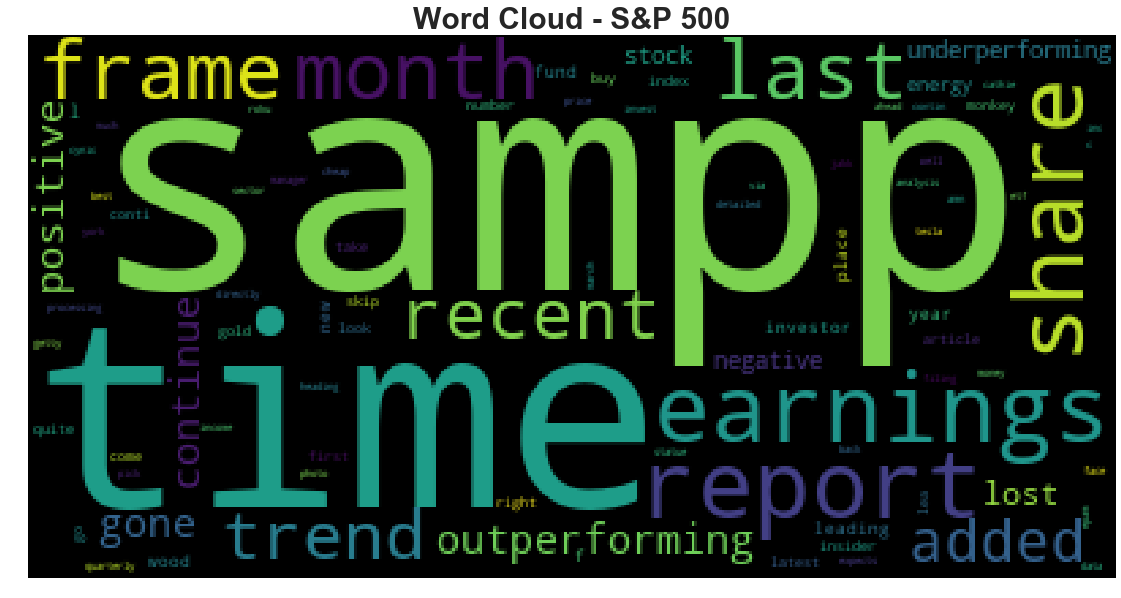

In [134]:
# Generate the S&P 500 word cloud
SP500_wc = WordCloud(collocations=False).generate(SP500_words)
fig = plt.figure()
plt.imshow(SP500_wc)
plt.title('Word Cloud - S&P 500', fontsize=30, fontweight='bold')
plt.axis('off')
plt.show()

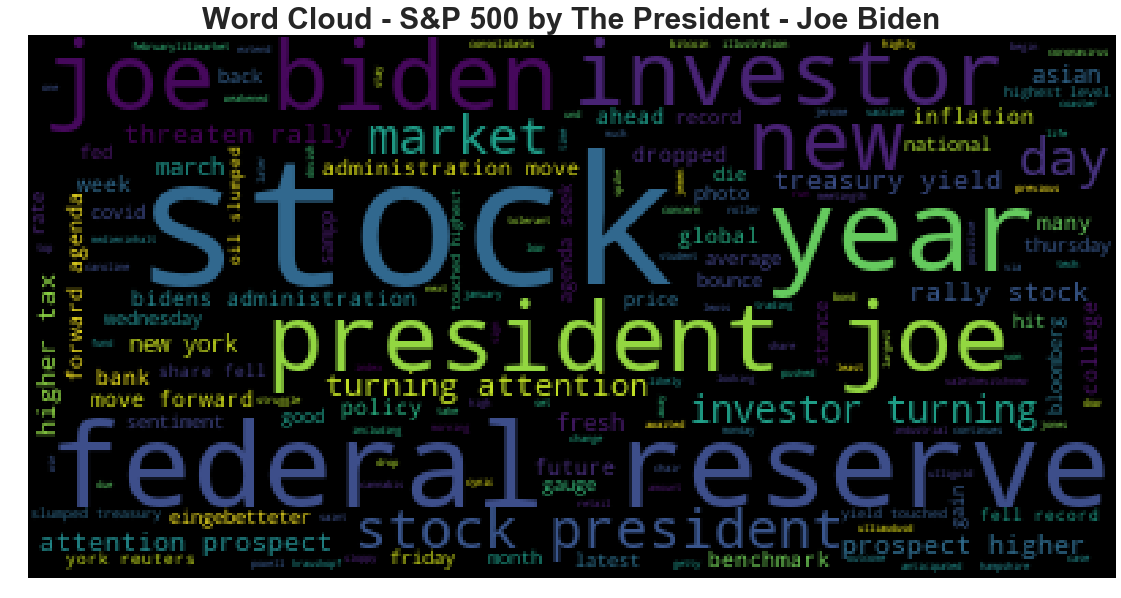

In [135]:
# Generate the S&P 500 by Donald Trump word cloud

fig = plt.figure()
potus_SP500_wc = WordCloud().generate(potus_SP500_words)
plt.imshow(potus_SP500_wc)
plt.title('Word Cloud - S&P 500 by The President - Joe Biden', fontsize=30, fontweight='bold')
plt.axis('off')
plt.show()

# Named Entity Recognition for all chosen options for S&P 500

In this section, we built a named entity recognition model for all options and visualized the tags using SpaCy.

In [136]:
import spacy
from spacy import displacy

In [137]:
import en_core_web_sm
nlp = en_core_web_sm.load()

## S&P 500 NER

In [138]:
# Concatenate all of the S&P 500 text together
SP500_sent = []
for sent in SP500_tokens['SP500 Text']:
    sent_list = sent
    SP500_sent.append(sent_list)
    
one_string_SP500 = ' '.join(SP500_sent)
one_string_SP500

'getty\r\nmarketing advocates of creative concepts can peacefully coexist with their number crunching teammates when the right funnel strategy is deployed.\r\nthats the perspective from the global consult… [+4601 chars] the latest 13f reporting period has come and gone, and insider monkey is again at the forefront when it comes to making use of this gold mine of data. insider monkey finished processing 887 13f filin… [+6294 chars] if you can see through these misperceptions about assets, you can be a better investor.\r\nmidas?\r\ngetty\r\nfallacy #1: price equals wealth\r\nsay you bought a $500,000 suburban house a while back and now … [+6841 chars] with the fourth-quarter round of 13f filings behind us it is time to take a look at the stocks in which some of the best money managers in the world preferred to invest or sell heading into the first… [+6341 chars] the insider monkey team has completed processing the quarterly 13f filings for the december quarter submitted by the hedge fund

In [139]:
# Run the NER processor on all of the text
SP500_doc = nlp(one_string_SP500)

# Add a title to the document
SP500_doc.user_data['title'] = 'S&P 500 NER'


In [140]:
# Render the visualization
displacy.render(SP500_doc, style='ent')

In [141]:
# List all Entities
for ent in SP500_doc.ents:
    print (ent, ent.label_)

13f DATE
887 13f DATE
1 MONEY
500,000 MONEY
fourth-quarter DATE
13f CARDINAL
first ORDINAL
quarterly 13f DATE
the december quarter DATE
10 CARDINAL
5 CARDINAL
10 CARDINAL
2021 DATE
5 CARDINAL
about 1.6% PERCENT
500 CARDINAL
about a month DATE
about 7.7% PERCENT
500 CARDINAL
about a month DATE
about 1.7% PERCENT
500 CARDINAL
about a month DATE
about 8% PERCENT
500 CARDINAL
about a month DATE
about 9.8% PERCENT
500 CARDINAL
about 6.8% PERCENT
500 CARDINAL
about a month DATE
about 3.2% PERCENT
500 CARDINAL
about 9.5% PERCENT
500 CARDINAL
about 6.5% PERCENT
500 CARDINAL
about 0.9% PERCENT
500 CARDINAL
about a month DATE
century DATE
about 31.9% PERCENT
500 CARDINAL
about a month DATE
about 13.3% PERCENT
500 CARDINAL
about 9% PERCENT
500 CARDINAL
about a month DATE
about 1.3% PERCENT
500 CARDINAL
about 3% PERCENT
500 CARDINAL
about a month DATE
about 0.3% PERCENT
500 CARDINAL
about a month DATE
about 0.8% PERCENT
500 CARDINAL
copart CARDINAL
about 10.3% PERCENT
500 CARDINAL
about 3.3% PERCE

---

## S&P 500 by Jim Cramer NER 

In [142]:
# Concatenate all of the Jim Cramer text together
cramer_SP500_sent = []
for sent in cramer_SP500_tokens['Cramer Text']:
    sent_list = sent
    cramer_SP500_sent.append(sent_list)
    
one_string_cramer_SP500 = ' '.join(cramer_SP500_sent)
one_string_cramer_SP500

'listen on the go! a daily podcast of wall street breakfast\'s alpha talks will be available this morning on seeking alpha, itunes, stitcher and spotify.\r\n\n\n \n \n \r\n\n \r\n\n \nmore wall street breakfast pod… [+13025 chars] on the one-year anniversary tuesday of the s&amp;p 500\'s one-day 12% crash, cnbc\'s jim cramer said that "betting on the end of the world is a sucker\'s game." what happened: the s&amp;p 500 index suff… [+1448 chars] listen on the go! a daily podcast of wall street breakfast will be available by 8:00 a.m. on seeking alpha, itunes, stitcher and spotify.\r\nin search of stability\r\nanother day, another yield battle. t… [+11125 chars] <ul><li>another day, another yield battle. the bond market went on a wild ride over the last 24 hours, with the 10-year treasury yield shooting up 11 bps to a 14-month high of 1.75%, before ending th… [+1684 chars] here\'s what jim cramer had to say about some of the stocks that callers offered up during the mad money lightning r

In [143]:
# Run the NER processor on all of the text
cramer_SP500_doc = nlp(one_string_cramer_SP500)

# Add a title to the document
cramer_SP500_doc.user_data['title'] = 'S&P 500 NER by Jim Cramer'


In [144]:
# Render the visualization
displacy.render(cramer_SP500_doc, style='ent')

In [145]:
# List all Entities
for ent in cramer_SP500_doc.ents:
    print (ent, ent.label_)

daily DATE
this morning TIME
one-year anniversary DATE
tuesday DATE
500 CARDINAL
one-day DATE
12% PERCENT
500 CARDINAL
daily DATE
8:00 a.m. TIME
the last 24 hours TIME
10-year DATE
11 CARDINAL
14-month DATE
1.75% PERCENT
thursday DATE
evening TIME
500 CARDINAL
thursday DATE
january 2020 DATE
five CARDINAL
thursday DATE
18 CARDINAL
thursday DATE
afternoon TIME
wednesday DATE
tuesday evening TIME
five CARDINAL
wednesday DATE
17 CARDINAL
a year ago DATE
tuesday DATE
500 CARDINAL
more than three decades DATE
weeks DATE
recent months DATE
tuesday DATE
tuesday DATE
u.s GPE
tuesday DATE
16 yea MONEY
five CARDINAL
tuesday DATE
16 CARDINAL
500's fifth day DATE
tuesday DATE
u.s GPE
millions CARDINAL
monday DATE
monday DATE
one-year DATE
$1.9 trillion MONEY
this past week DATE
500 CARDINAL
friday DATE
the past week DATE
the week DATE
evening TIME
this past week DATE
500 CARDINAL
friday DATE
evening TIME
five CARDINAL
monday DATE
15 CARDINAL
monday DATE
one-year DATE
five CARDINAL
thursday DATE
11

## S&P 500 NER by The President Mr. Donald Trump

In [146]:
# Concatenate all of the Joe Biden text together
potus_SP500_sent = []
for sent in potus_SP500_tokens['Biden Text']:
    sent_list = sent
    potus_SP500_sent.append(sent_list)
    
one_string_potus_SP500 = ' '.join(potus_SP500_sent)
one_string_potus_SP500

"blackrock ceo larry fink at a conference in new york in 2017(lucas jackson/reuters)\r\nthe week of march 15: esgs new clothes, tax troubles ahead, inflation ahead (or not) and much, much more.on the wh… [+45822 chars] on the whole, i would rather live in a society was run by cynics than by saintscynics tend to be less intrusive. however, when cynics pretend to be saints, they are playing a dangerous game, as many … [+45103 chars] the year 2020 was a good one for cannabis stocks, and 2021 is looking even better. many investors find it hard to go all in on u.s. cannabis stocks, given that a lack of federal legalization keeps th… [+5672 chars] it isn't a popular time to be buying up coronavirus stocks. with president joe biden projecting that by later this year, life could be back to normal, many investors are shifting away from stocks tha… [+5870 chars] new york: investors are turning their attention to prospects that higher taxes could threaten the rally in us stocks as president joe b

In [147]:
# Run the NER processor on all of the text
potus_SP500_doc = nlp(one_string_potus_SP500)

# Add a title to the document
potus_SP500_doc.user_data['title'] = 'S&P 500 NER by Joe Biden'

In [148]:
# Render the visualization
displacy.render(potus_SP500_doc, style='ent')

# Revised LSTM Model 1 (Single Neuron)
###### LSTM networks are well-suited to classifying, processing and making predictions based on time series data, since there can be lags of unknown duration between important events ###### in a time series. LSTMs were developed to deal with the vanishing gradient problem that can be encountered when training traditional RNNs.

In [149]:

import pandas as pd
# Additional Imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [150]:
# Read in the data
model_df4 = pd.read_csv('final_db_spy_sent.csv')
model_df4.set_index(("Date"), inplace=True)
model_df4.drop(columns=['Daily Returns', 'Cumulative Returns'], inplace=True)
data4 = model_df4.fillna(model_df4.mean())
data4.head(1)

,SPY Close,VIX Close,SPX 1M 25DP Vol BVOL INDEX,SPX 1M 25DC Vol BVOL INDEX,SPX 1M 100 Vol BVOL INDEX,P/C Ratio,P/C Spread,P/ATM Ratio,P/ATM Spread,ATM/C Ratio,...,Fink Text_coronavirus impact an increasing wave of companies and ceos are doubling down on sustainability and equality commitments as they grapple with what role they play in a changing society. salesforce has long been a believer that business can be one of the bigge… [+6888 chars],"Fink Text_coronavirus might be the biggest story of the decade, but climate change will be the grand narrative of the century. as energy of any kind becomes of premium value to the planet, and the worlds transport systems come onto the electric grid, how will notorio… [+9224 chars]",Fink Text_going linux · show notes 2020 episodes: mar 17: #388 · linux spotlight interview rocco (bigdaddylinux) interviews larry on episode 39 of the linux spotlight. the following resources are mentioned in this episode: <ol><li>linux spotlight interview: https… [+748545 chars],"Fink Text_investment management giant blackrock inc. blk, +4.53% filed late thursday its 2020 proxy statement with the securities and exchange commission, showing that chief executive larry fink has taken a pay cut for the second-straight year in 2019. fink's bas… [+822 chars]",Fink Text_larry fink was not exactly a household name until president trump singled him out in a white house press briefing on march 28th as one of the smartest people in the world who is helping figure out how americas airlines and other big u.s. companies can weather… [+13897 chars],Fink Text_legendary corporate raider carl icahn warned that trouble was brewing in the fast-growing exchange traded fund industry when he locked horns with blackrock chief larry fink in 2015. the world’s largest asset manager had created an illusion of liquidity in hi… [+7065 chars],"Fink Text_normally, the ""style box update"" is done mid-quarter and then the last day of the quarter, but tuesday might be busy. growth is still hammering value, and by a wide, wide, margin. no doubt energy and now the financial sector have dragged the ""value"" style th… [+5113 chars]","Fink Text_the controversial stock buyback has met its most formidable opponent perhaps ever. its name is coronavirus. with household name companies like delta air lines, intel and others in search of cash as the u.s. economy grinds to a complete stop amid the pandemi… [+6683 chars]","Fink Text_we have an opportunity to build a better economy. the question is whether we will seize it. photo by pat greenhouse/the boston globe via getty images boston globe via getty images the covid-19 pandemic has not only wrought untold human tragedy, it has la… [+6799 chars]","Fink Text_with the un pushing to cut greenhouse emissions by 7.6 percent every year between now and 2030, the time to act on climate is now. as sustainability and impact investing become mainstream, companies are facing more pressure from all sides -- investors, employ… [+4702 chars]"
Date,,,,,,,,,,,,,,,,,,,,,
4/3/2020,248.190002,46.799999,52.8947,35.8183,46.3582,1.48,17.08,1.14,6.54,1.29,...,0,0,0,0,0,0,0,0,0,0


In [151]:
import numpy as np
# Set target Data which is the SPY_Close and normalize features data
dataset = data4["SPY Close"].values
dataset = np.reshape(dataset, (-1, 1))
# Use MinMaxScaler to scale data to values between 0 and 1
scaler = MinMaxScaler()
# Scale the dataset
dataset = scaler.fit_transform(dataset)
# Use 80% of data for training and the remainder for testing
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [152]:
def create_dataset(dataset, look_back):
    X = []
    y = []
    for i in range(len(dataset)-look_back):
        features = dataset[i:(i+look_back), 0]
        target = dataset[i + look_back, 0]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y)
    
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape features data to be a vertical vector to be compatible with LSTM API
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
#X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
#X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [153]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
#from keras.layers.recurrent import LSTM
# Define The LSTM RNN Model
model = Sequential()

number_units = 100
dropout_fraction = 0.2

#Layer 1
model.add(LSTM(
    units=number_units, 
    return_sequences=True,
    #Input shape is 1 time hop with features data =16
    input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(dropout_fraction))

#Output Layer
model.add(Dense(1))

# Compile Model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# Fit the Model
history = model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=2, verbose=2 )

model.summary()

Train on 1226 samples
Epoch 1/10
1226/1226 - 3s - loss: 0.0354 - mse: 0.0354
Epoch 2/10
1226/1226 - 1s - loss: 0.0054 - mse: 0.0054
Epoch 3/10
1226/1226 - 1s - loss: 0.0035 - mse: 0.0035
Epoch 4/10
1226/1226 - 2s - loss: 0.0028 - mse: 0.0028
Epoch 5/10
1226/1226 - 1s - loss: 0.0023 - mse: 0.0023
Epoch 6/10
1226/1226 - 1s - loss: 0.0020 - mse: 0.0020
Epoch 7/10
1226/1226 - 1s - loss: 0.0020 - mse: 0.0020
Epoch 8/10
1226/1226 - 1s - loss: 0.0017 - mse: 0.0017
Epoch 9/10
1226/1226 - 1s - loss: 0.0016 - mse: 0.0016
Epoch 10/10
1226/1226 - 1s - loss: 0.0016 - mse: 0.0016
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1, 100)            40800     
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 100)            0         
_________________________________________________________________
dense_2 (

In [154]:
# Evaluate the model
model.evaluate(X_test, y_test)

306/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.0028867566915460273, 0.0028867568]

In [155]:
# Make Predictions
predicted = model.predict(X_test)

predicted_prices = scaler.inverse_transform(predicted.reshape(-1,1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [156]:
# Create a DataFrame of Real and Predicted Values
model_1_lstm = pd.DataFrame({
    "Actual": actual_prices.ravel(),
    "Predicted": predicted_prices.ravel()
})
model_1_lstm.head()

,Actual,Predicted
0,186.141541,189.222046
1,186.802124,188.892502
2,188.449036,189.217590
3,186.177689,190.028595
4,185.752426,188.910294


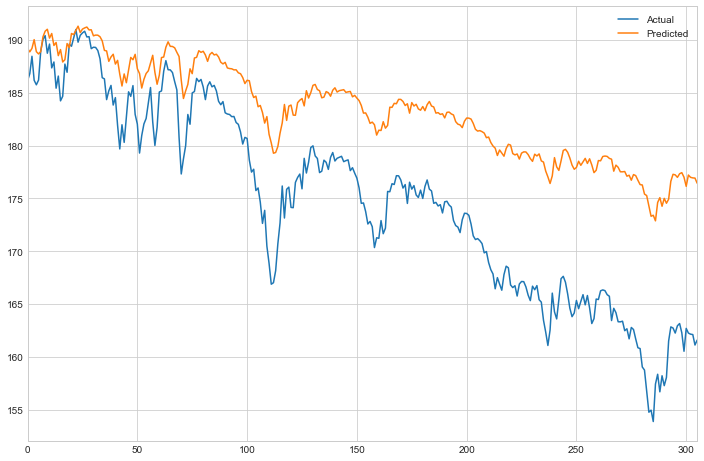

In [86]:
model_1_lstm.plot(figsize=(12,8))

# Revised LSTM Model Multi layers

In [87]:
# Additional Imports
import seaborn as sns
sns.set_style('white')
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
import math


# Read in the data
model_df5 = pd.read_csv('final_db_spy_sent.csv')
model_df5.set_index(("Date"), inplace=True)
model_df5.drop(columns=['Daily Returns', 'Cumulative Returns'], inplace=True)
data5 = model_df5
print("Number of rows and columns:", data5.shape)
data5.head(1)

Number of rows and columns: (1534, 390)


,SPY Close,VIX Close,SPX 1M 25DP Vol BVOL INDEX,SPX 1M 25DC Vol BVOL INDEX,SPX 1M 100 Vol BVOL INDEX,P/C Ratio,P/C Spread,P/ATM Ratio,P/ATM Spread,ATM/C Ratio,...,Fink Text_coronavirus impact an increasing wave of companies and ceos are doubling down on sustainability and equality commitments as they grapple with what role they play in a changing society. salesforce has long been a believer that business can be one of the bigge… [+6888 chars],"Fink Text_coronavirus might be the biggest story of the decade, but climate change will be the grand narrative of the century. as energy of any kind becomes of premium value to the planet, and the worlds transport systems come onto the electric grid, how will notorio… [+9224 chars]",Fink Text_going linux · show notes 2020 episodes: mar 17: #388 · linux spotlight interview rocco (bigdaddylinux) interviews larry on episode 39 of the linux spotlight. the following resources are mentioned in this episode: <ol><li>linux spotlight interview: https… [+748545 chars],"Fink Text_investment management giant blackrock inc. blk, +4.53% filed late thursday its 2020 proxy statement with the securities and exchange commission, showing that chief executive larry fink has taken a pay cut for the second-straight year in 2019. fink's bas… [+822 chars]",Fink Text_larry fink was not exactly a household name until president trump singled him out in a white house press briefing on march 28th as one of the smartest people in the world who is helping figure out how americas airlines and other big u.s. companies can weather… [+13897 chars],Fink Text_legendary corporate raider carl icahn warned that trouble was brewing in the fast-growing exchange traded fund industry when he locked horns with blackrock chief larry fink in 2015. the world’s largest asset manager had created an illusion of liquidity in hi… [+7065 chars],"Fink Text_normally, the ""style box update"" is done mid-quarter and then the last day of the quarter, but tuesday might be busy. growth is still hammering value, and by a wide, wide, margin. no doubt energy and now the financial sector have dragged the ""value"" style th… [+5113 chars]","Fink Text_the controversial stock buyback has met its most formidable opponent perhaps ever. its name is coronavirus. with household name companies like delta air lines, intel and others in search of cash as the u.s. economy grinds to a complete stop amid the pandemi… [+6683 chars]","Fink Text_we have an opportunity to build a better economy. the question is whether we will seize it. photo by pat greenhouse/the boston globe via getty images boston globe via getty images the covid-19 pandemic has not only wrought untold human tragedy, it has la… [+6799 chars]","Fink Text_with the un pushing to cut greenhouse emissions by 7.6 percent every year between now and 2030, the time to act on climate is now. as sustainability and impact investing become mainstream, companies are facing more pressure from all sides -- investors, employ… [+4702 chars]"
Date,,,,,,,,,,,,,,,,,,,,,
4/3/2020,248.190002,46.799999,52.8947,35.8183,46.3582,1.48,17.08,1.14,6.54,1.29,...,0,0,0,0,0,0,0,0,0,0


In [88]:
# Set the random seed for reproducibility - comment out until final model version
#from numpy.random import seed
#seed(1)
#from tensorflow import random
#random.set_seed(3)

# Set target Data which is the SPY_Close and normalize features data
dataset = data5["SPY Close"].values
dataset = np.reshape(dataset, (-1, 1))
# Use MinMaxScaler to scale data to values between 0 and 1
scaler = MinMaxScaler()
# Scale the dataset
dataset = scaler.fit_transform(dataset)
# Use 80% of data for training and the remainder for testing
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [89]:
def create_dataset(dataset, look_back =1):
    X = []
    y = []
    for i in range(len(dataset)-look_back):
        features = dataset[i:(i+look_back), 0]
        target = dataset[i + look_back, 0]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y)
    
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape features data to be a vertical vector to be compatible with LSTM API
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
#X1_train = X_train.reshape((X1_train.shape[0], X_train.shape[1], 1))
#X1_test = X_test.reshape((X1_test.shape[0], X_test.shape[1], 1))

In [90]:
# Define The LSTM RNN Model
model2 = Sequential()

number_units = 100
dropout_fraction = 0.2
# Layer 1
model2.add(LSTM(units=number_units,
                return_sequences=True,
    #Input shape is 1 time hop with features data of 16
    input_shape = (X_train.shape[1], 1)))
model2.add(Dropout(dropout_fraction))
# Layer 2
model2.add(LSTM(units=number_units,
               return_sequences=True))
model2.add(Dropout(dropout_fraction))
# Layer 3
model2.add(LSTM(units=number_units))
model2.add(Dropout(dropout_fraction))
# Output Layer
model2.add(Dense(1))

#Compile the Model 
model2.compile(loss='mean_squared_error', optimizer='adam')

# Fit the Model
history = model2.fit(X_train, y_train, epochs=15, shuffle=False, batch_size=2, verbose=1 )

model2.summary()

Train on 1226 samples
Epoch 1/15
1226/1226 [==============================] - 14s 12ms/sample - loss: 0.0255
Epoch 2/15
1226/1226 [==============================] - 5s 4ms/sample - loss: 0.0046
Epoch 3/15
1226/1226 [==============================] - 5s 4ms/sample - loss: 0.0055
Epoch 4/15
1226/1226 [==============================] - 5s 4ms/sample - loss: 0.0066
Epoch 5/15
1226/1226 [==============================] - 5s 4ms/sample - loss: 0.0080
Epoch 6/15
1226/1226 [==============================] - 5s 4ms/sample - loss: 0.0087
Epoch 7/15
1226/1226 [==============================] - 5s 4ms/sample - loss: 0.0091
Epoch 8/15
1226/1226 [==============================] - 5s 4ms/sample - loss: 0.0095
Epoch 9/15
1226/1226 [==============================] - 5s 4ms/sample - loss: 0.0095
Epoch 10/15
1226/1226 [==============================] - 5s 4ms/sample - loss: 0.0094
Epoch 11/15
1226/1226 [==============================] - 5s 4ms/sample - loss: 0.0065
Epoch 12/15
1226/1226 [================

In [91]:
# Evaluate the model
model.evaluate(X_test, y_test)

306/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.00280399723404568, 0.0028039974]

In [92]:
predicted = model2.predict(X_test)

predicted_prices = scaler.inverse_transform(predicted.reshape(-1,1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [93]:
# Create a DataFrame of Real and Predicted Values
model_2_lstm = pd.DataFrame({
    "Actual": actual_prices.ravel(),
    "Predicted": predicted_prices.ravel()
})
model_2_lstm.head()

,Actual,Predicted
0,186.141541,190.179703
1,186.802124,190.171600
2,188.449036,190.179596
3,186.177689,190.202774
4,185.752426,190.172012


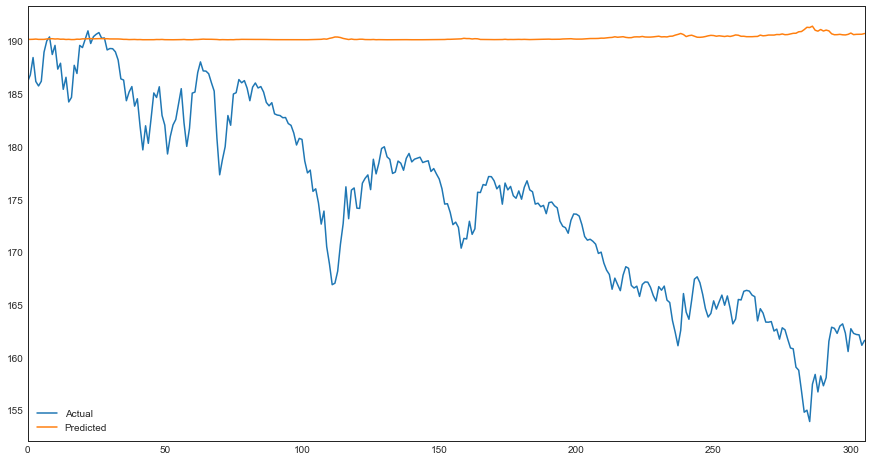

In [94]:
model_2_lstm.plot(figsize=(15,8))